# HWK 3 - Finance

## Part 1
    1.1 Connecting with yfinance
    1.2 Plotting Graphs
    1.3 Downloading Tickers
    1.4 Get Stock Labels
    1.5 Generating Dictionary 
    1.6 Retriveing Historical Data
    1.7 Calculation returns and correlation
    1.8 Minimum Spanning Tree
 
 
## Part 2
    2.1 Santiy Checks and Dealing with missing values
    2.2 Clustering 
    2.3 Linear Regression
    2.4 Classification

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1.1 Connecting with the Yahoo! Finance service

In [2]:
import yfinance as yf

yahoo = yf.Ticker('AAPL')
d = yf.download('AAPL', start="2014-05-19", end="2014-05-20")
# d=yahoo.get_historical('2014-05-19', '2014-05-20')
print "A week of stock daily quotations:"
for e in d:
    print e
print "Info about the company:",yahoo.get_info()
print "Market capitalization in dollars:",yahoo.get_info()['marketCap']


[*********************100%***********************]  1 of 1 completed
A week of stock daily quotations:
Adj Close
Close
High
Low
Open
Volume
Info about the company: {u'sector': u'Technology', u'dayHigh': 281.66, u'trailingPE': 22.21834, u'fundFamily': None, u'revenueQuarterlyGrowth': None, u'quoteType': u'EQUITY', u'lastMarket': None, u'shortPercentOfFloat': 0.0089, u'sharesPercentSharesOut': 0.0089, u'exchangeTimezoneName': u'America/New_York', u'gmtOffSetMilliseconds': u'-14400000', u'regularMarketVolume': 14744612, u'averageVolume10days': 41379080, u'nextFiscalYearEnd': 1632787200, u'isEsgPopulated': False, u'enterpriseToEbitda': 15.962, u'earningsQuarterlyGrowth': 0.114, u'morningStarRiskRating': None, u'fiftyDayAverage': 263.85883, u'regularMarketDayLow': 277.5612, u'address1': u'One Apple Park Way', u'bid': 280.19, u'lastSplitFactor': u'7:1', u'mostRecentQuarter': 1577491200, u'longBusinessSummary': u'Apple Inc. designs, manufactures, and markets smartphones, personal computers, t

In [3]:
d=yf.download('AAPL',start="2014-01-01", end="2014-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
V=[]
V=d['Volume']*d['Adj Close']

In [5]:
V

Date
2014-01-02    4.162067e+09
2014-01-03    6.807411e+09
2014-01-06    7.195826e+09
2014-01-07    5.492482e+09
2014-01-08    4.504794e+09
2014-01-09    4.801962e+09
2014-01-10    5.211237e+09
2014-01-13    6.501304e+09
2014-01-14    5.826017e+09
2014-01-15    6.998719e+09
2014-01-16    4.074413e+09
2014-01-17    7.397622e+09
2014-01-21    5.783564e+09
2014-01-22    6.719191e+09
2014-01-23    7.190765e+09
2014-01-24    7.517297e+09
2014-01-27    9.793828e+09
2014-01-28    1.730371e+10
2014-01-29    8.072756e+09
2014-01-30    1.087243e+10
2014-01-31    7.460215e+09
2014-02-03    6.455657e+09
2014-02-04    6.144823e+09
2014-02-05    5.396315e+09
2014-02-06    4.261037e+09
2014-02-07    6.206626e+09
2014-02-10    5.896016e+09
2014-02-11    4.879390e+09
2014-02-12    5.325760e+09
2014-02-13    5.397986e+09
                  ...     
2014-11-17    4.884469e+09
2014-11-18    4.680873e+09
2014-11-19    4.400928e+09
2014-11-20    4.626595e+09
2014-11-21    6.104535e+09
2014-11-24    5.159859e

## 1.2 Transaction volumes computation and plotting

/Users/kanakkhanna/Library/Python/2.7/lib/python/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


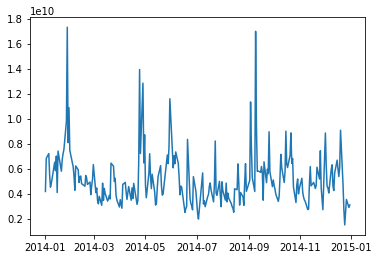

In [6]:

# V = []
# for s in d:
#     print float(s['Volume'])*float(s['Adj Close'])
#     V.append(float(s['Volume'])*float(s['Adj Close']))
plot(V)
savefig('yahoo_volume.png')

## 1.3 Download NYSE tickers
### with all the information related to the market capitalization, sector and industry...
### (http://www.nasdaq.com/screening/company-list.aspx)

In [9]:
!head companylist.csv 


In [10]:
import pandas as pd
stock=pd.read_csv('companylist.csv')

In [11]:
stock.head()

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8
0,DDD,3D Systems Corporation,21.92,$2.45B,NaN,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd,NaN
1,MMM,3M Company,160.16,$101.6B,NaN,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm,NaN
2,WBAI,500.com Limited,22.00,$773.44M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai,NaN
3,WUBA,58.com Inc.,76.16,$6.92B,2013.0,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba,NaN
4,AHC,A.H. Belo Corporation,5.92,$128.76M,NaN,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc,NaN


In [12]:
stock['MarketCap'][0]

'$2.45B'

## 1.4 Get Stock Labels, Sector and Industries

In [13]:
#this code will take approximative 1 hour to retrieve the data
#depending on the internet connection
#if you want to skip this procedure just uncomment the following lines
#import sys
#f=open("./data/list_stocks_50B_6_may_2016.txt",'r')
#list_stocks=[]
#while True:
#    next_line=f.readline()
#    if not next_line: break
#    list_stocks.append(tuple(next_line.split('\t')[:-1]))
# f.close()
#sys.exit(1)

import time

hfile=open("companylist.csv",'r')
#we choose to get only companies with a market capitalisation
#greater than 50B$
cap_threshold=50.0 

list_stocks=[]
nextline=hfile.readline()
while True:
    nextline=hfile.readline()
    if not nextline:
        break
    line=nextline.split(',')
    sym=line[0][1:-1]
    share = yf.Ticker(sym)
    y_market_cap=line[3][1:-1]
    if not y_market_cap: continue
    #we will exclude stocks with char ’^’ that will
    #give errors in the query process
    if y_market_cap[-1]=='B' and float(y_market_cap \
        [1:-1])>cap_threshold and line[0].find('^')==-1:
        print sym,y_market_cap
        list_stocks.append((line[0][1:-1],line[1][1:-1],\
                            line[5][1:-1],line[6][1:-1]))
#     time.sleep(1)

hfile.close()

MMM $101.6B
ABT $72.74B
ABBV $106.75B
ACN $63.34B
BABA $226.57B
MO $99.02B
ABEV $90.5B
AXP $81.87B
BUD $197.93B
AZN $85.45B
T $181.91B
BBVA $63.38B
BAC $177.8B
BNS $64.84B
BCS $69.45B
BHP $118.16B
BBL $111.51B
BA $99.45B
BP $137.47B
BMY $109.52B
BT $57.39B
CVX $192.13B
CHL $272.12B
SNP $103.47B
CHA $54.74B
C $168.79B
KO $178.14B
CL $60.22B
COP $78.66B
CVS $114.99B
DHR $61.72B
DEO $69.3B
DOW $61.11B
DUK $51.31B
DD $64.52B
LLY $86.37B
EMC $52.53B
E $66.12B
EPD $63.01B
XOM $355.19B
FDX $51.05B
F $60.43B
GE $277.39B
GM $57.67B
GSK $106.33B
HPQ $61.72B
HON $82.06B
HSBC $184.11B
IBM $167.33B
ITUB $59.07B
JPM $247.53B
JNJ $277.55B
LYG $98.07B
LMT $60.4B
MA $104.36B
MCD $92.52B
MCK $54.88B
MTU $103.73B
MON $55.11B
MS $76.85B
NTT $75.53B
NVS $248.71B
NVO $152.77B
OXY $60.2B
ORCL $192.02B
PTR $215.78B
PBR $57.53B
PM $127.68B
PG $213.13B
PUK $63.92B
RIO $82.08B
RY $92.95B
RBS $61.63B
SNY $134.84B
SAP $90.43B
SLB $116B
STO $59.47B
SMFG $61.94B
TSM $122.7B
TGT $51.3B
TEF $67.72B
TEVA $51.51B
BX $51

In [179]:
list_stocks  

[('MMM', '3M Company', 'Health Care', 'Medical/Dental Instruments'),
 ('ABT', 'Abbott Laboratories', 'Health Care', 'Major Pharmaceuticals'),
 ('ABBV', 'AbbVie Inc.', 'Health Care', 'Major Pharmaceuticals'),
 ('ACN', 'Accenture plc.', 'Miscellaneous', 'Business Services'),
 ('BABA',
  'Alibaba Group Holding Limited',
  'Miscellaneous',
  'Business Services'),
 ('MO', 'Altria Group', 'Consumer Non-Durables', 'Farming/Seeds/Milling'),
 ('ABEV',
  'Ambev S.A.',
  'Consumer Non-Durables',
  'Beverages (Production/Distribution)'),
 ('AXP', 'American Express Company', 'Finance', 'Finance: Consumer Services'),
 ('BUD',
  'Anheuser-Busch Inbev SA',
  'Consumer Non-Durables',
  'Beverages (Production/Distribution)'),
 ('AZN', 'Astrazeneca PLC', 'Health Care', 'Major Pharmaceuticals'),
 ('T', 'AT&T Inc.', 'Public Utilities', 'Telecommunications Equipment'),
 ('BBVA',
  'Banco Bilbao Viscaya Argentaria S.A.',
  'Finance',
  'Commercial Banks'),
 ('BAC', 'Bank of America Corporation', 'Finance', '

## 1.5 Generate dictionaries for companies, sectors and colors

In [15]:
diz_sectors={}
for s in list_stocks:
    diz_sectors[s[0]]=s[2]

list_ranking=[]
for s in set(diz_sectors.values()):
    list_ranking.append((diz_sectors.values().count(s),s))

list_ranking.sort(reverse=True)

#list_colors=['red','green','blue','black''cyan','magenta','yellow'] 
list_colors=['0.0', '0.2', '0.4', '0.6','0.7', '0.8', '0.9'] 

#'white' is an extra color for 'n/a' and 'other' sectors

diz_colors={}

#association color and more represented sectors
for s in list_ranking:
    if s[1]=='n/a': 
        diz_colors[s[1]]='white'
        continue
    if list_colors==[]: 
        diz_colors[s[1]]='white'
        continue
    diz_colors[s[1]]=list_colors.pop(0)

## 1.6 Retrieving historical data

In [16]:
start_period='2013-05-01'
end_period='2014-05-31'
diz_comp={}
for s in list_stocks:
    print s[0]
    stock = yf.Ticker(s[0])
    diz_comp[s[0]]=yf.download(s[0],start=start_period, end=end_period)

#create dictionaries of time series for each company
# diz_historical={}
# for k in diz_comp.keys():
#     if diz_comp[k] is None: continue
#     diz_historical[k]={}
#     for e in diz_comp[k]:
#         diz_historical[k]=e['Close']

# for k in diz_historical.keys():
#     print k,len(diz_historical[k])

MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
BABA
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BABA: Data doesn't exist for startDate = 1367380800, endDate = 1401508800
MO
[*********************100%***********************]  1 of 1 completed
ABEV
[*********************100%***********************]  1 of 1 completed
AXP
[*********************100%***********************]  1 of 1 completed
BUD
[*********************100%***********************]  1 of 1 completed
AZN
[*********************100%***********************]  1 of 1 completed
T
[*********************100%***********************]  1 of 1 completed
BBVA
[*********************100%***********************]  1 of 1 completed
BAC
[*********************1

In [15]:
e=diz_comp['ABBV']
e['Close']

Date
2013-05-01    45.549999
2013-05-02    43.990002
2013-05-03    44.680000
2013-05-06    44.590000
2013-05-07    44.910000
2013-05-08    43.490002
2013-05-09    44.240002
2013-05-10    45.009998
2013-05-13    44.540001
2013-05-14    45.349998
2013-05-15    46.029999
2013-05-16    46.209999
2013-05-17    47.169998
2013-05-20    46.259998
2013-05-21    46.540001
2013-05-22    46.759998
2013-05-23    46.590000
2013-05-24    45.439999
2013-05-28    45.389999
2013-05-29    43.880001
2013-05-30    44.549999
2013-05-31    42.689999
2013-06-03    43.360001
2013-06-04    43.630001
2013-06-05    43.040001
2013-06-06    43.500000
2013-06-07    44.000000
2013-06-10    43.919998
2013-06-11    43.590000
2013-06-12    42.770000
                ...    
2014-04-17    48.549999
2014-04-21    49.430000
2014-04-22    50.009998
2014-04-23    50.139999
2014-04-24    49.320000
2014-04-25    49.139999
2014-04-28    50.869999
2014-04-29    51.369999
2014-04-30    52.080002
2014-05-01    51.610001
2014-05-02 

In [17]:
diz_historical={}
for k in diz_comp.keys():
    if diz_comp[k] is None: continue
    diz_historical[k]={}
#     for e in diz_comp[k]:
    diz_historical[k]=diz_comp[k]['Close']

for k in diz_historical.keys():
    print k,len(diz_historical[k])

UTX 273
AXP 273
BA 273
BT 0
BP 273
EPD 273
BX 273
RY 273
ITUB 273
RIO 273
LYG 273
SAP 273
CHA 273
BNS 273
CHL 273
GE 273
T 273
MCK 273
GM 273
BMY 273
UBS 0
SNP 273
JNJ 273
SNY 273
ABEV 273
TSM 273
EMC 273
WFC 273
DEO 273
FDX 273
GSK 273
LLY 273
TEVA 273
PG 273
BCS 273
PTR 273
BUD 273
PM 273
BABA 0
C 273
OXY 273
PBR 273
BBVA 273
MA 273
MO 273
UL 273
UN 273
MON 273
MS 273
NVO 273
COP 273
ACN 273
DOW 0
IBM 273
CVX 273
TEF 273
UNP 273
BBL 273
F 273
CVS 273
TMO 273
V 273
UNH 273
NVS 273
PUK 273
LMT 273
NTT 0
HSBC 273
MMM 273
TWC 0
USB 273
AZN 273
DD 273
SMFG 273
DUK 273
BAC 273
TWX 273
WBK 273
DIS 273
TGT 273
CL 273
KO 273
ORCL 273
TM 273
TD 273
E 273
HON 273
HPQ 273
STO 0
RBS 273
MTU 0
ABBV 273
ABT 273
VZ 273
XOM 273
DHR 273
SLB 273
JPM 273
MCD 273
BHP 273


In [17]:
diz_historical

{'ABBV': Date
 2013-05-01    45.549999
 2013-05-02    43.990002
 2013-05-03    44.680000
 2013-05-06    44.590000
 2013-05-07    44.910000
 2013-05-08    43.490002
 2013-05-09    44.240002
 2013-05-10    45.009998
 2013-05-13    44.540001
 2013-05-14    45.349998
 2013-05-15    46.029999
 2013-05-16    46.209999
 2013-05-17    47.169998
 2013-05-20    46.259998
 2013-05-21    46.540001
 2013-05-22    46.759998
 2013-05-23    46.590000
 2013-05-24    45.439999
 2013-05-28    45.389999
 2013-05-29    43.880001
 2013-05-30    44.549999
 2013-05-31    42.689999
 2013-06-03    43.360001
 2013-06-04    43.630001
 2013-06-05    43.040001
 2013-06-06    43.500000
 2013-06-07    44.000000
 2013-06-10    43.919998
 2013-06-11    43.590000
 2013-06-12    42.770000
                 ...    
 2014-04-17    48.549999
 2014-04-21    49.430000
 2014-04-22    50.009998
 2014-04-23    50.139999
 2014-04-24    49.320000
 2014-04-25    49.139999
 2014-04-28    50.869999
 2014-04-29    51.369999
 2014-04-30

## Return of prices

In [18]:
reference_company='ABEV'
diz_returns={}
d=diz_historical[reference_company].keys()
d.values.sort()
print len(d),d

for c in diz_historical.keys():
    #check if the company has the whole set of dates
    if len(diz_historical[c].keys())<len(d): continue
    diz_returns[c]={}
    for i in range(1,len(d)):
        #price returns
        diz_returns[c][d[i]]=math.log( \
        float(diz_historical[c][d[i]])) \
        -math.log(float(diz_historical[c][d[i-1]]))

print diz_returns[reference_company]

273 DatetimeIndex(['2013-05-01', '2013-05-02', '2013-05-03', '2013-05-06',
               '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10',
               '2013-05-13', '2013-05-14',
               ...
               '2014-05-16', '2014-05-19', '2014-05-20', '2014-05-21',
               '2014-05-22', '2014-05-23', '2014-05-27', '2014-05-28',
               '2014-05-29', '2014-05-30'],
              dtype='datetime64[ns]', name=u'Date', length=273, freq=None)
{Timestamp('2013-05-13 00:00:00'): 0.01094727850464583, Timestamp('2013-06-18 00:00:00'): -0.020106799940066145, Timestamp('2013-10-07 00:00:00'): -0.011695997725563068, Timestamp('2013-12-02 00:00:00'): -0.03226083119837009, Timestamp('2013-08-23 00:00:00'): 0.032382125398664474, Timestamp('2014-02-05 00:00:00'): 0.004691131833768791, Timestamp('2014-01-23 00:00:00'): -0.025389210096549597, Timestamp('2014-04-25 00:00:00'): -0.01808833119880715, Timestamp('2014-05-09 00:00:00'): 0.0067888534782434284, Timestamp('2013-08-20 0

## 1.7 Calculating returns and correlations

## Basic Statistics and the Correlation Coefficient

In [19]:
#mean
def mean(X):
    m=0.0
    for i in X:
        m=m+i
    return m/len(X)

#covariance
def covariance(X,Y):
    c=0.0
    m_X=mean(X)
    m_Y=mean(Y)
    for i in range(len(X)):
        c=c+(X[i]-m_X)*(Y[i]-m_Y)
    return c/len(X)

#pearson correlation coefficient
def pearson(X,Y):
    return covariance(X,Y)/(covariance(X,X)**0.5 * \
                            covariance(Y,Y)**0.5)

## Correlation of price returns

In [20]:
def stocks_corr_coeff(h1,h2):
    l1=[]
    l2=[]
    intersec_dates=set(h1.keys()).intersection(set(h2.keys()))
    for d in intersec_dates:
        l1.append(float(h1[d]))
        l2.append(float(h2[d]))
    return pearson(l1,l2)

#correlation with the same company has to be 1!
print stocks_corr_coeff(diz_returns[reference_company], \
                        diz_returns[reference_company])

1.0


## Build the correlation Network

In [21]:
import math
import networkx as nx

corr_network=nx.Graph()

num_companies=len(diz_returns.keys())
for i1 in range(num_companies-1):
    for i2 in range(i1+1,num_companies):
        stock1=diz_returns.keys()[i1]
        stock2=diz_returns.keys()[i2]
        #metric distance
        metric_distance=math.sqrt(2*(1.0-stocks_corr_coeff\
                (diz_returns[stock1],diz_returns[stock2])))
        #building the network
        corr_network.add_edge(stock1, stock2, weight=metric_distance)

print "number of nodes:",corr_network.number_of_nodes()
print "number of edges:",corr_network.number_of_edges()

number of nodes: 92
number of edges: 4186


## 1.8 Minimum Spanning Tree with ([Prim's algorithm](http://en.wikipedia.org/wiki/Prim%27s_algorithm))

In [22]:
tree_seed=reference_company
N_new=[]
E_new=[]
N_new.append(tree_seed)
while len(N_new)<corr_network.number_of_nodes():
    min_weight=10000000.0
    for n in N_new:
        for n_adj in corr_network.neighbors(n):
            if not n_adj in N_new:
                if corr_network[n][n_adj]['weight']<min_weight:
                    min_weight=corr_network[n][n_adj]['weight']
                    min_weight_edge=(n,n_adj)
                    n_adj_ext=n_adj
    E_new.append(min_weight_edge)
    N_new.append(n_adj_ext)

#generate the tree from the edge list
tree_graph=nx.Graph()
tree_graph.add_edges_from(E_new)

#setting the color attributes for the network nodes
for n in tree_graph.nodes():
    tree_graph.node[n]['color']=diz_colors[diz_sectors[n]]

## Printing the Financial Minimum Spanning Tree

/opt/anaconda3/envs/py2/lib/python2.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: 0.0 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


(-581.2512495723563, 10247.751872838051, -535.8807408757755, 9253.147503328933)

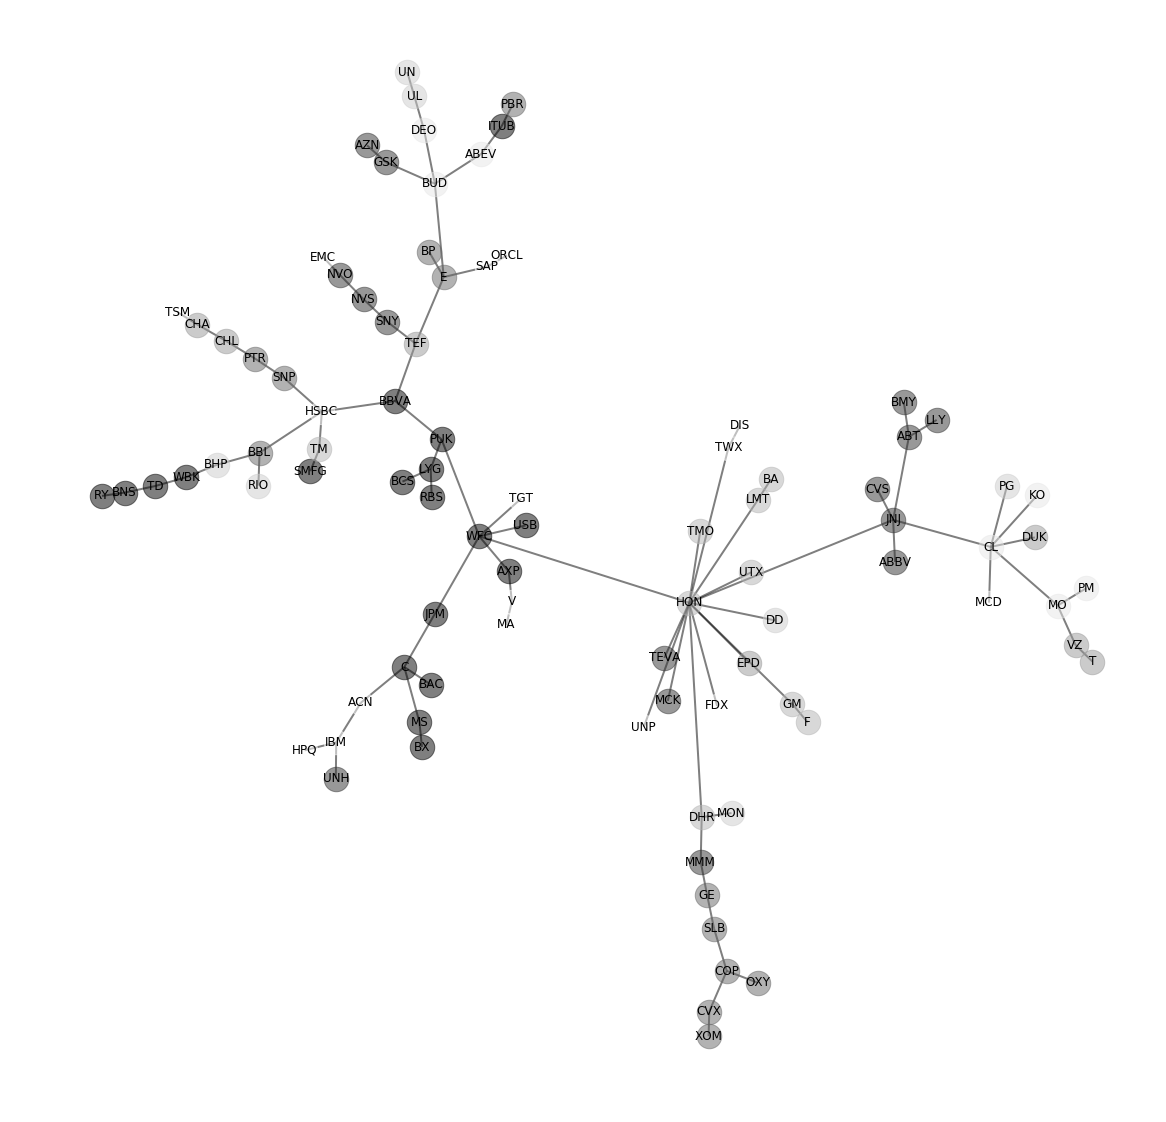

In [24]:
pos=nx.nx_agraph.graphviz_layout(tree_graph,prog='neato', \
                       args='-Gmodel=subset -Gratio=fill')

figure(figsize=(20,20))
nx.draw_networkx_edges(tree_graph,pos,width=2, \
                       edge_color='black', alpha=0.5, style="solid")
nx.draw_networkx_labels(tree_graph,pos)
for n in tree_graph.nodes():
    nx.draw_networkx_nodes(tree_graph, pos, [n], node_size = 600, \
    alpha=0.5, node_color = tree_graph.node[n]['color'], \
    with_labels=True)

axis('off')

# savefig('./data/MST_50B_new.png',dpi=600)

# Part 2

## 2.1 Dealing with Missiing Values and Sanity checks
     Detecting Missing Values with EDA using methods like info, describe, isnull
      

In [107]:
import datetime
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import numpy as np


#### This dictionary consists of 37 tickers

In [108]:
companies_dict = {
 'Amazon': 'AMZN',
 'Facebook': 'FB',
 'Target': 'TGT',
 'Wallmart' : 'WMT',
 'Costco' : 'COST',
 'Bestbuy':'BBY',
 'Lowes':'LOW',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Mitsubishi': 'MSBHY',
 'Sony': 'SNE',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC',
 'JP Morgan':'JPM',
 'Citigroup': 'C',
 'Goldman Sachs': 'GS',
 'Wells Fargo':'WFC'
}

In [109]:
companies = sorted(companies_dict.items(), key=lambda x: x[1]) # setting key as index 1, which is the stock ticker.

In [110]:
data_source = 'yahoo'

# defining the timeline of dataset which is 4 years
start_date = '2015-01-01'
end_date = '2019-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
stock_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

In [111]:
stock_data.head()

Attributes   Adj Close                                                \
Symbols           AAPL        AMZN        AXP          BA        BAC   
Date                                                                   
2015-01-02  100.216454  308.519989  85.268341  112.786011  16.352423   
2015-01-05   97.393181  302.190002  83.013344  112.004875  15.877379   
2015-01-06   97.402374  295.290009  81.244171  110.685638  15.402342   
2015-01-07   98.768150  298.420013  83.018562  112.404106  15.475423   
2015-01-08  102.563072  300.459991  84.195335  114.391670  15.795165   

Attributes                                                          ...  \
Symbols           BBY          C        COST        CVX          F  ...   
Date                                                                ...   
2015-01-02  33.560791  49.932064  124.577209  90.693550  11.654848  ...   
2015-01-05  32.695602  48.358463  123.160820  87.068390  11.199583  ...   
2015-01-06  32.401432  46.656021  124.788300  87.028099  11.093352  ...   
2015-01-07  33.335846  47.088531  126.961243  86.955597  11.412041  ...   
2015-01-08  33.837662  47.797112  128.052032  88.945412  11.700377  ...   

Attributes     Volume                                                        \
Symbols           PEP        SNE        TGT        TM        TXN        VLO   
Date                                                                          
2015-01-02  3545700.0  1229900.0  3710300.0  250000.0  4020100.0  5897000.0   
2015-01-05  6441000.0  1083100.0  3778200.0  240600.0  5599300.0  7732700.0   
2015-01-06  6195000.0  2209100.0  4659300.0  285600.0  5468400.0  8586800.0   
2015-01-07  6526300.0  2486300.0  6946900.0  385700.0  4577100.0  8825800.0   
2015-01-08  7131600.0  1296500.0  6344900.0  498800.0  6295200.0  8941700.0   

Attributes                                                 
Symbols           WBA         WFC         WMT         XOM  
Date                                                       
2015-01-02  3938500.0  11700900.0   4501800.0  10220400.0  
2015-01-05  4767900.0  15000500.0   6979000.0  18502400.0  
2015-01-06  4881600.0  20211200.0   8205100.0  16670700.0  
2015-01-07  5672100.0  15714700.0   8498400.0  13590700.0  
2015-01-08  4083900.0  16721600.0  12713600.0  15487500.0  

[5 rows x 222 columns]

In [112]:
stock_data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Columns: 222 entries, (Adj Close, AAPL) to (Volume, XOM)
dtypes: float64(222)
memory usage: 1.7 MB


In [113]:
stock_data.describe()

Attributes    Adj Close                                                      \
Symbols            AAPL         AMZN          AXP           BA          BAC   
count       1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean         134.708162   946.176810    77.770286   195.353197    20.370606   
std           36.011102   456.980704    14.938069    88.211763     6.176547   
min           85.192909   286.950012    47.709141    97.400223    10.319693   
25%          105.232620   591.822495    67.278078   123.117100    14.661510   
50%          119.662155   818.119995    74.491367   146.006485    21.221838   
75%          163.718990  1192.844971    91.613920   282.845886    26.334105   
max          227.300339  2039.510010   110.261681   379.444489    31.447468   

Attributes                                                                   \
Symbols             BBY            C         COST          CVX            F   
count       1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean          45.091536    54.994086   160.776836    94.332972    10.311790   
std           16.330103    10.579340    29.689381    14.508431     1.070270   
min           22.970373    32.323948   121.569206    58.254200     7.035324   
25%           30.288460    46.761348   138.615280    85.405251     9.598724   
50%           40.671263    53.909826   152.122826    93.703983    10.316831   
75%           57.981510    64.784988   181.054398   106.227549    10.970488   
max           78.538063    75.676773   240.753616   122.186607    12.701269   

Attributes  ...        Volume                                            \
Symbols     ...           PEP           SNE           TGT            TM   
count       ...  1.006000e+03  1.006000e+03  1.006000e+03  1.006000e+03   
mean        ...  4.484670e+06  1.208645e+06  5.880345e+06  2.767933e+05   
std         ...  1.703341e+06  8.249431e+05  3.768097e+06  1.751285e+05   
min         ...  1.044300e+06  1.882000e+05  1.097700e+06  4.840000e+04   
25%         ...  3.426575e+06  7.106250e+05  3.907025e+06  1.652000e+05   
50%         ...  4.178000e+06  9.855500e+05  4.963500e+06  2.331500e+05   
75%         ...  5.168625e+06  1.419950e+06  6.723425e+06  3.362500e+05   
max         ...  2.755970e+07  9.220200e+06  4.949170e+07  2.073300e+06   

Attributes                                                          \
Symbols              TXN           VLO           WBA           WFC   
count       1.006000e+03  1.006000e+03  1.006000e+03  1.006000e+03   
mean        5.631626e+06  5.087117e+06  5.232448e+06  1.969686e+07   
std         2.706380e+06  2.230435e+06  3.058734e+06  9.111038e+06   
min         1.288300e+06  1.440200e+06  1.367000e+06  4.914000e+06   
25%         3.917750e+06  3.390625e+06  3.419900e+06  1.424402e+07   
50%         5.015400e+06  4.669200e+06  4.489550e+06  1.738495e+07   
75%         6.562375e+06  6.273725e+06  6.086575e+06  2.211678e+07   
max         2.512170e+07  1.423840e+07  4.046570e+07  1.033944e+08   

Attributes                              
Symbols              WMT           XOM  
count       1.006000e+03  1.006000e+03  
mean        9.196229e+06  1.277211e+07  
std         5.349156e+06  5.035483e+06  
min         2.482800e+06  3.851300e+06  
25%         6.404175e+06  9.408725e+06  
50%         7.954050e+06  1.159845e+07  
75%         1.020618e+07  1.480328e+07  
max         8.089810e+07  4.728730e+07  

[8 rows x 222 columns]

#### As observed below no null values can be seen in the dataset

In [114]:
stock_data.isnull().sum()

Attributes  Symbols
Adj Close   AAPL       0
            AMZN       0
            AXP        0
            BA         0
            BAC        0
            BBY        0
            C          0
            COST       0
            CVX        0
            F          0
            FB         0
            GE         0
            GS         0
            HMC        0
            IBM        0
            INTC       0
            JNJ        0
            JPM        0
            KO         0
            LMT        0
            LOW        0
            MA         0
            MCD        0
            MSBHY      0
            MSFT       0
            NAV        0
            NOC        0
            PEP        0
            SNE        0
            TGT        0
                      ..
Volume      COST       0
            CVX        0
            F          0
            FB         0
            GE         0
            GS         0
            HMC        0
            IBM        0
     

## 1.2 Clustering

In [180]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=10, tol=0.004, max_iter=300) #I have chose 10 clusters 

In [181]:
clus.fit(stock_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.004, verbose=0)

In [197]:
# Find Stock Open and Close Values
s_close = stock_data['Close']
s_open = stock_data['Open']

In [198]:
# Calculate daily stock movement we have to convert our array into a numpy array and T will transpose the array
s_close = np.array(s_close).T
s_open = np.array(s_open).T

row, col = s_close.shape
#to start of this movement array is a blank numpy array
movements = np.zeros([row, col]) 

for i in range(0, row):
 movements[i,:] = np.subtract(s_close[i,:], s_open[i,:])

In [199]:
#printing the daily stock movement for each ticker - Sanity check
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 2.12994384766
Company: Amazon, Change: -671.710083008
Company: American Express, Change: -11.1598815918
Company: Boeing, Change: 58.1800537109
Company: Bank of America, Change: -10.9400148392
Company: Bestbuy, Change: 15.3300685883
Company: Citigroup, Change: -24.7899742126
Company: Costco, Change: 37.8396911621
Company: Chevron, Change: -7.35991668701
Company: Ford, Change: -12.1100049019
Company: Facebook, Change: 27.929901123
Company: General Electric, Change: -5.94226551056
Company: Goldman Sachs, Change: -103.18989563
Company: Honda, Change: -15.3699989319
Company: IBM, Change: -23.6199798584
Company: Intel, Change: 15.6200466156
Company: Johnson & Johnson, Change: 22.3798675537
Company: JP Morgan, Change: -14.6800994873
Company: Coca Cola, Change: 11.249961853
Company: Lockheed Martin, Change: -59.8899536133
Company: Lowes, Change: -1.8800163269
Company: MasterCard, Change: 19.9598922729
Company: McDonalds, Change: 37.8299179077
Company: Mitsubishi, Change

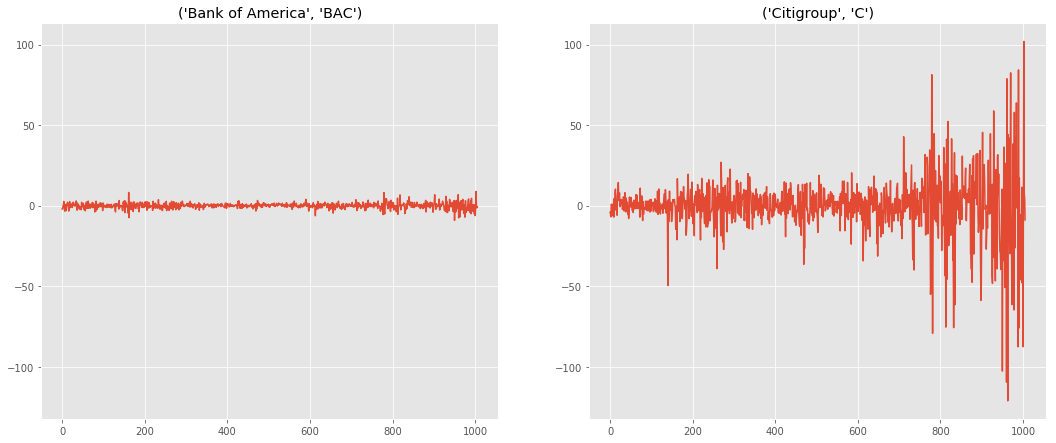

In [186]:
# EDA of dataset 
# I have taken two tickers and both are banks BAC and C

plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[4])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[6])
plt.show()


#### These plots show difference in price movement hence we have to normalize the data before clusterring to get a better outcome

In [45]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.25392232816518356
-0.3330716227165943
-0.0002132057675505431


#### Result after normalization

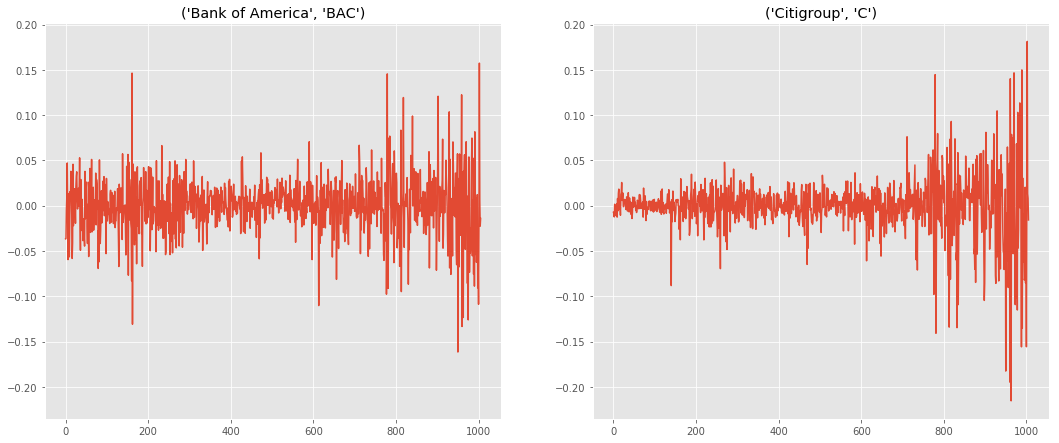

In [188]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[4])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[6])
plt.show()

In [191]:
from sklearn.cluster import KMeans
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)#Selected size of clusters as 10

#### Performing PCA and the predicting the labels of the clusters

In [193]:
from sklearn.decomposition import PCA 
reduced_data = PCA(n_components = 2).fit_transform(new)
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values('labels'))

                   companies  labels
32      (Valero Energy, VLO)       0
5             (Bestbuy, BBY)       0
23       (Mitsubishi, MSBHY)       0
20              (Lowes, LOW)       0
14                (IBM, IBM)       0
34        (Wells Fargo, WFC)       1
4     (Bank of America, BAC)       1
6             (Citigroup, C)       1
12       (Goldman Sachs, GS)       1
17          (JP Morgan, JPM)       1
0              (Apple, AAPL)       2
3               (Boeing, BA)       2
31  (Texas Instruments, TXN)       2
28               (Sony, SNE)       2
15             (Intel, INTC)       2
27              (Pepsi, PEP)       3
18           (Coca Cola, KO)       3
36              (Exxon, XOM)       4
11    (General Electric, GE)       4
8             (Chevron, CVX)       4
9                  (Ford, F)       4
2    (American Express, AXP)       5
30              (Toyota, TM)       5
25           (Navistar, NAV)       5
13              (Honda, HMC)       5
22          (McDonalds, MCD)       6
2

#### In the result obtained above we can see that how banks are in one cluster and similarly how banks have formed their own clusters

<Figure size 432x288 with 0 Axes>

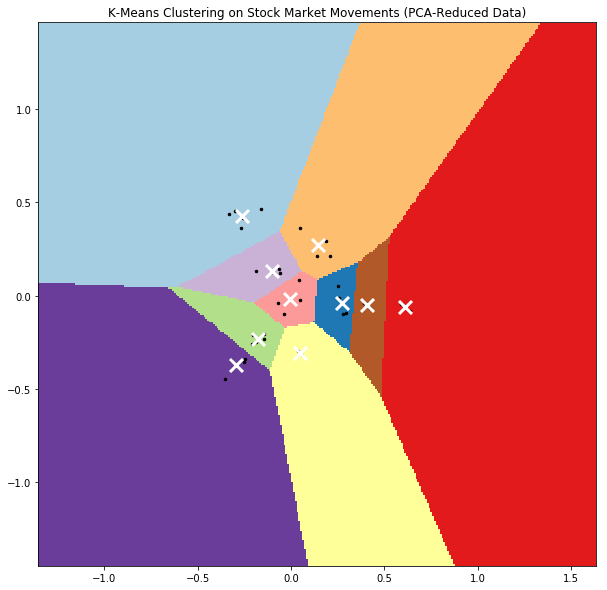

In [50]:
h = 0.01# size of the mesh
 
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1# ploting the boundry  
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Getting the labels of each point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired #using colorplot

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

centroids = kmeans.cluster_centers_# centroid of the cluster is white
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#### Claculating stock returns for all stocks 

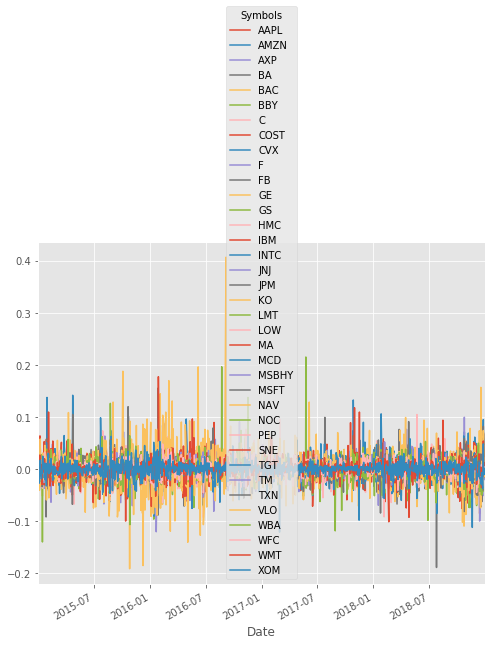

In [84]:
rets = stock_close / stock_close.shift(1) - 1
rets.plot(label='return')

## 2.3 Linear Regression

In [ ]:
#creating a new dataframe with just date and adjusted close 

In [130]:
adj_data = stock_data['Adj Close']
adj_data.head()

Symbols,AAPL,AMZN,AXP,BA,BAC,BBY,C,COST,CVX,F,...,PEP,SNE,TGT,TM,TXN,VLO,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,100.216454,308.519989,85.268341,112.786011,16.352423,33.560791,49.932064,124.577209,90.693550,11.654848,...,80.964714,19.997332,63.426998,107.282745,46.602119,41.446724,67.541489,46.377533,75.466400,75.439079
2015-01-05,97.393181,302.190002,83.013344,112.004875,15.877379,32.695602,48.358463,123.160820,87.068390,11.199583,...,80.356018,19.705545,62.290306,105.319267,45.878860,39.742428,66.208420,45.105747,75.246773,73.374931
2015-01-06,97.402374,295.290009,81.244171,110.685638,15.402342,32.401432,46.656021,124.788300,87.028099,11.093352,...,79.747322,19.695818,62.281887,104.235085,45.120754,39.256660,66.377274,44.164642,75.826607,72.984848
2015-01-07,98.768150,298.420013,83.018562,112.404106,15.475423,33.335846,47.088531,126.961243,86.955597,11.412041,...,82.079216,20.940788,64.639450,106.855896,45.931152,38.952030,68.074707,44.427475,77.838448,73.724373
2015-01-08,102.563072,300.459991,84.195335,114.391670,15.795165,33.837662,47.797112,128.052032,88.945412,11.700377,...,83.570938,20.969967,64.942551,108.913284,46.680542,41.183273,68.918983,45.410984,79.481316,74.951500


In [194]:
#calculating the rolling mean and just plotting garph for one ticker to see clearly 

In [195]:
m = adj_data.rolling(window=100).mean()

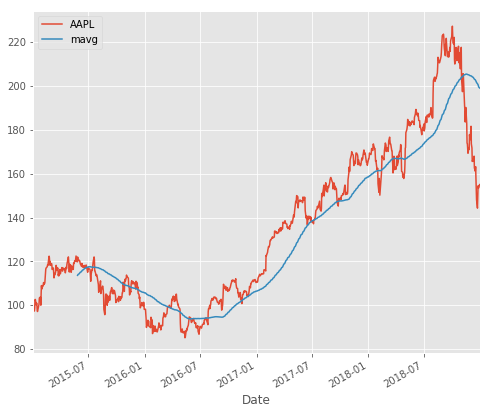

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

adj_data['AAPL'].plot(label='AAPL')
m['AAPL'].plot(label='mavg')
plt.legend()

#### The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [145]:
adj_data.to_excel("output.xlsx")  

In [146]:
#creating a variable to predict for coming 30 days
forecast_out = 30 
adj_data['Prediction'] = adj_data[['AAPL']].shift(-forecast_out) #shifting the target n units up
print(adj_data.tail())

Symbols           AAPL         AMZN        AXP          BA        BAC  \
Date                                                                    
2018-12-24  144.314041  1343.959961  87.416260  285.834320  22.083479   
2018-12-26  154.476852  1470.900024  91.655205  305.044769  23.424227   
2018-12-27  153.474335  1461.640015  92.475655  308.163910  23.676830   
2018-12-28  153.552979  1478.020020  92.221695  307.425446  23.696262   
2018-12-31  155.037109  1501.969971  93.100761  313.372223  23.939152   

Symbols           BBY          C        COST         CVX         F  ...  \
Date                                                                ...   
2018-12-24  46.477821  47.582745  187.746216   95.925880  7.035324  ...   
2018-12-26  49.686180  49.688515  196.284164  102.004959  7.238178  ...   
2018-12-27  50.061932  50.007286  198.705261  103.838173  7.238178  ...   
2018-12-28  49.464577  50.065239  199.653885  103.201775  7.201295  ...   
2018-12-31  51.025398  50.287411  201.

/Users/kanakkhanna/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [148]:
X = np.array(adj_data.drop(['Prediction'],1))#dataframe is converted into numpy array
X = X[:-forecast_out]#removing last 30 rows of the output
print(X)


[[ 100.21645355  308.51998901   85.26834106 ...   46.37753296
    75.46640015   75.43907928]
 [  97.39318085  302.19000244   83.01334381 ...   45.10574722
    75.24677277   73.37493134]
 [  97.40237427  295.29000854   81.24417114 ...   44.16464233
    75.82660675   72.98484802]
 ...
 [ 190.84284973 1636.84997559  104.01068878 ...   49.79794312
   100.80951691   75.10311127]
 [ 188.93608093 1631.17004395  105.34880066 ...   50.16893387
    99.90691376   73.3814621 ]
 [ 183.59915161 1599.01000977  105.26089478 ...   49.60769653
    98.53846741   72.80757904]]


In [149]:
y = np.array(adj_data['Prediction'])
y = y[:-forecast_out] #getting all the values except last 30
print(y)

[117.63677216 118.45581055 118.20733643 119.17359924 122.39450836
 121.6306839  118.5202179  120.02024841 118.21653748 118.79629517
 119.04476166 118.29013824 116.33000946 116.50484467 117.00180054
 114.58150482 112.49252319 114.52629089 113.73485565 114.98642731
 116.90975952 118.22573853 117.33309937 115.86067963 117.06620026
 116.587677   113.54161835 114.33304596 113.42199707 116.29319
 114.50788116 114.34223938 115.32691193 117.19503021 115.96190643
 115.5845871  116.4680481  116.96498871 116.73491669 116.22879028
 116.67050171 116.10913086 114.80236816 117.42511749 116.79013824
 118.36377716 119.33004761 119.89141083 122.07239532 120.14907837
 118.38218689 115.17047882 118.66745758 118.43739319 115.76864624
 115.04164886 115.75320435 117.93408966 116.73274994 116.31691742
 116.44629669 119.16313934 118.99681091 120.30901337 120.19814301
 120.18889618 121.41796112 122.48069763 119.7822876  122.01863861
 121.77835083 120.39221191 120.63246155 120.09648132 120.24434662
 119.54202271

In [150]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80-20 split

In [151]:
lr = LinearRegression() #computing liner regression on training dataset
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
# Testing model to get the score of prediction
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

('lr confidence: ', 0.9720460443896831)


In [154]:
x_forecast = np.array(adj_data.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[ 188.13014221 1619.43994141  107.04829407 ...   50.24503708
    96.60710144   73.56021881]
 [ 190.21380615 1593.41003418  106.9115448  ...   50.35918427
    94.81160736   74.28461456]
 [ 182.67524719 1512.29003906  105.72971344 ...   50.72066116
    93.92841339   74.52922058]
 ...
 [ 153.47433472 1461.64001465   92.4756546  ...   43.31042099
    89.37641907   64.85791779]
 [ 153.55297852 1478.02001953   92.22169495 ...   43.54822922
    89.90337372   64.13349915]
 [ 155.03710938 1501.9699707    93.10076141 ...   43.83360672
    90.89871979   64.15233612]]


In [155]:
#printing the prediction of linear regression model for next 30 days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[165.69426188 160.77257254 159.98002149 163.48785517 163.80503731
 165.56709392 168.58156461 165.94152717 166.04721166 161.34631467
 165.02786397 164.29088619 163.02108106 167.92609357 165.05388568
 161.32082183 162.23239621 164.0744335  157.62263473 157.72555535
 151.7103022  152.3010139  154.94559975 157.8492109  155.95902549
 155.78475028 154.94717696 158.48417081 152.8343187  153.40474785]


## 2.4 Classification

#### EDA of few tickers of software companies

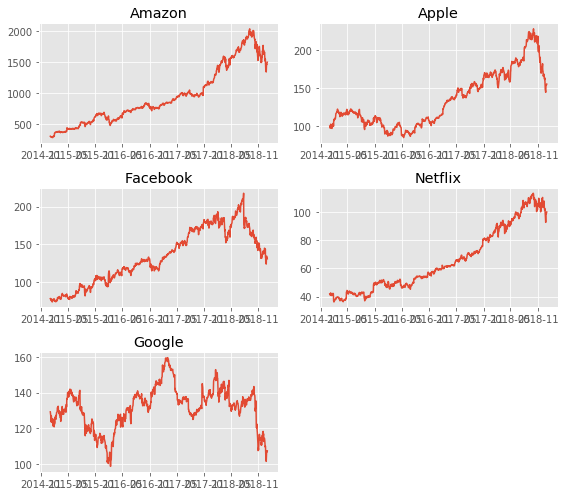

In [159]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'])
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'])
ax4.set_title("Netflix")
ax5.plot(stock_data['Adj Close']['IBM'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

#### Calculating daily and monthly stock returns of all the tickers 

In [160]:
stock_daily_returns = stock_data['Adj Close'].pct_change()
stock_monthly_returns = stock_data['Adj Close'].resample('M').ffill().pct_change()

<Figure size 576x504 with 0 Axes>

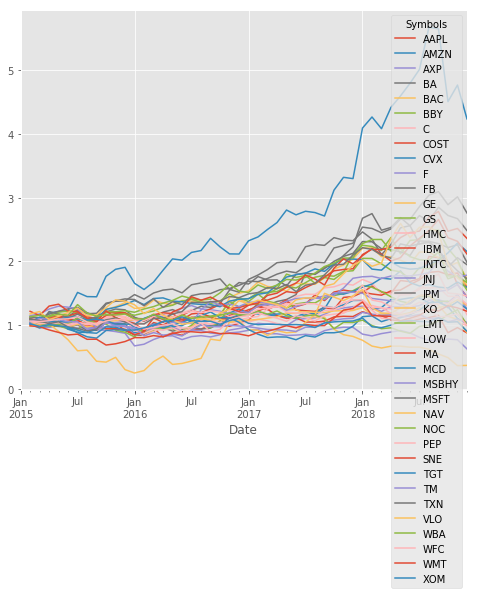

In [162]:
fig = plt.figure()
(stock_monthly_returns + 1).cumprod().plot()
plt.show()

## Statitical analysis

In [163]:
print(stock_monthly_returns.mean())
print(stock_monthly_returns.std())

Symbols
AAPL     0.010712
AMZN     0.034712
AXP      0.006622
BA       0.021904
BAC      0.014479
BBY      0.014258
C        0.005805
COST     0.011482
CVX      0.006378
F       -0.008303
FB       0.013568
GE      -0.018575
GS       0.002930
HMC      0.001357
IBM     -0.000805
INTC     0.011702
JNJ      0.008551
JPM      0.016274
KO       0.006423
LMT      0.010844
LOW      0.010305
MA       0.019669
MCD      0.017361
MSBHY    0.014285
MSFT     0.023699
NAV      0.013364
NOC      0.012365
PEP      0.006853
SNE      0.019574
TGT      0.002687
TM       0.001950
TXN      0.015843
VLO      0.013777
WBA      0.002290
WFC      0.001841
WMT      0.005716
XOM     -0.001026
dtype: float64
Symbols
AAPL     0.076632
AMZN     0.085974
AXP      0.058398
BA       0.070366
BAC      0.075999
BBY      0.081691
C        0.071352
COST     0.054031
CVX      0.057668
F        0.056591
FB       0.062163
GE       0.069761
GS       0.071176
HMC      0.056120
IBM      0.061828
INTC     0.060092
JNJ      0.0402

## Correlation 

In [164]:
print(stock_monthly_returns.corr())

Symbols      AAPL      AMZN       AXP        BA       BAC       BBY         C  \
Symbols                                                                         
AAPL     1.000000  0.343579  0.253779  0.250469  0.214770  0.169887  0.281224   
AMZN     0.343579  1.000000  0.324540  0.415963  0.391120  0.121643  0.479926   
AXP      0.253779  0.324540  1.000000  0.470786  0.678405  0.392089  0.702484   
BA       0.250469  0.415963  0.470786  1.000000  0.512299  0.180954  0.587502   
BAC      0.214770  0.391120  0.678405  0.512299  1.000000  0.265844  0.868258   
BBY      0.169887  0.121643  0.392089  0.180954  0.265844  1.000000  0.314084   
C        0.281224  0.479926  0.702484  0.587502  0.868258  0.314084  1.000000   
COST     0.380336  0.420752  0.269287  0.394710  0.261442  0.295802  0.328692   
CVX      0.017431  0.248704  0.416753  0.436845  0.411242  0.076986  0.509385   
F        0.273580  0.165187  0.571825  0.332549  0.396595  0.169759  0.483508   
FB       0.372440  0.483117 

In [165]:
print(stock_monthly_returns.cov())

Symbols      AAPL      AMZN       AXP        BA       BAC       BBY         C  \
Symbols                                                                         
AAPL     0.005872  0.002264  0.001136  0.001351  0.001251  0.001064  0.001538   
AMZN     0.002264  0.007392  0.001629  0.002516  0.002556  0.000854  0.002944   
AXP      0.001136  0.001629  0.003410  0.001935  0.003011  0.001871  0.002927   
BA       0.001351  0.002516  0.001935  0.004951  0.002740  0.001040  0.002950   
BAC      0.001251  0.002556  0.003011  0.002740  0.005776  0.001650  0.004708   
BBY      0.001064  0.000854  0.001871  0.001040  0.001650  0.006673  0.001831   
C        0.001538  0.002944  0.002927  0.002950  0.004708  0.001831  0.005091   
COST     0.001575  0.001955  0.000850  0.001501  0.001074  0.001306  0.001267   
CVX      0.000077  0.001233  0.001403  0.001773  0.001802  0.000363  0.002096   
F        0.001186  0.000804  0.001890  0.001324  0.001706  0.000785  0.001952   
FB       0.001774  0.002582 

In [174]:
stock_sub = adj_data[['AAPL','AMZN','IBM','FB']] #inorder to plot a better graph just taking 4 tickers of software companies

In [175]:
df_change = stock_sub.apply(lambda x: np.log(x) - np.log(x.shift(1))) #applying log returns equation on adjusted closing price

In [176]:
df_change.head()

Symbols,AAPL,AMZN,IBM,FB
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020731,-0.015860,-0.016191
2015-01-06,0.000094,-0.023098,-0.021802,-0.013565
2015-01-07,0.013925,0.010544,-0.006557,0.000000
2015-01-08,0.037703,0.006813,0.021502,0.026309


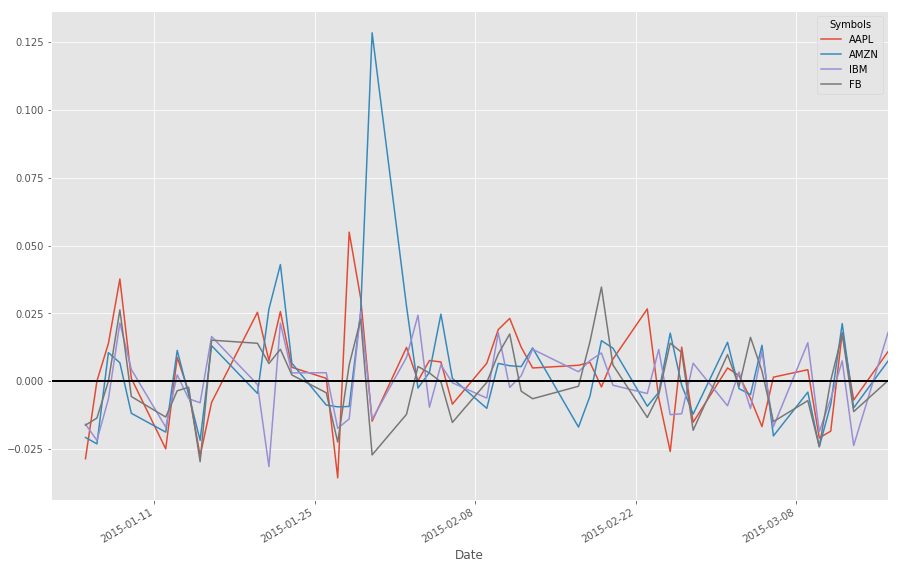

In [177]:
df_change[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)